In [5]:
import sys 
sys.path.append('../../src')

import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from spaceoracle.oracles import BaseTravLR
from spaceoracle.plotting.cartography import Cartography


In [6]:
import json

with open('colors.json', 'r') as f:
    color_dict = json.load(f)

In [40]:
figure_params = {
    'dpi': 300, 
    'bbox_inches': 'tight', 
    'format': 'svg', 
    'transparent': True
}

plt.rcParams.update({
    "text.usetex": False,
    "svg.fonttype": 'none'
})

In [7]:
adata = sc.read_h5ad('/Volumes/SSD/training_data/snrna_human_melanoma.h5ad')
adata

AnnData object with n_obs × n_vars = 4804 × 3396
    obs: 'X', 'Y', 'cell_type', 'author_cell_type', 'cell_type_int'
    uns: 'author_cell_type_colors', 'cell_thresholds', 'neighbors', 'pca', 'received_ligands', 'received_ligands_tfl', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial', 'spatial_unscaled'
    varm: 'PCs'
    layers: 'imputed_count', 'normalized_count'
    obsp: 'connectivities', 'distances'

In [8]:
adata.obs.cell_type.value_counts()

cell_type
CD8+ T      2119
Tumor 1      812
Mono-mac     692
Plasma/B     654
CD4+ T       198
Treg         123
Other        119
Tumor 2       87
Name: count, dtype: int64

In [9]:
import glob 

In [10]:
from spaceoracle.virtual_tissue import VirtualTissue

melanoma = VirtualTissue(
    adata = adata,
    annot = 'cell_type',
    betadatas_path = '/Volumes/SSD/lasso_runs/human_melanoma',
    ko_path = '/Volumes/SSD/genome_screens/human_melanoma',
    color_dict=color_dict
)

In [26]:
impact_df = melanoma.compute_ko_impact(
    annot='cell_type', 
    baseline_only=False,
    genes=[i.split('/')[-1].split('_')[0] for i in paths if '4n' in i.split('/')[-1]]
)

In [19]:
extra = kidney.compute_ko_impact(
    annot='cell_type', 
    baseline_only=False,
    genes=['Cd200']
)

In [27]:
impact_df.to_csv('../../notebooks/melanoma_slidetags/impact_df.csv')

In [28]:
colors = [
    [
        "#F8766D",
        "#7CAE00",
        "#00BFC4",
        "#C77CFF"
    ], 
    
    [
        "#c2568d",
        "#8fcd51",
        "#7e46b8",
        "#be9d56",
    ],
    [
        "#8d96c3",
        "#c4513a",
        "#79b796",
        "#4c3c3c"
    ]
]

In [32]:
impact_df.columns

Index(['BCL6', 'BMP6', 'BMPR2', 'CD163', 'CD19', 'CD27', 'CD44', 'CD74',
       'ERBB3', 'FOXO1', 'FOXP3', 'GZMA', 'GZMB', 'IFNG', 'IFNGR2', 'IL26',
       'IL7', 'IL7R', 'LGALS9', 'NRG2', 'PARD3', 'PAX5', 'PDCD1', 'PRDM1',
       'STAT4'],
      dtype='object')

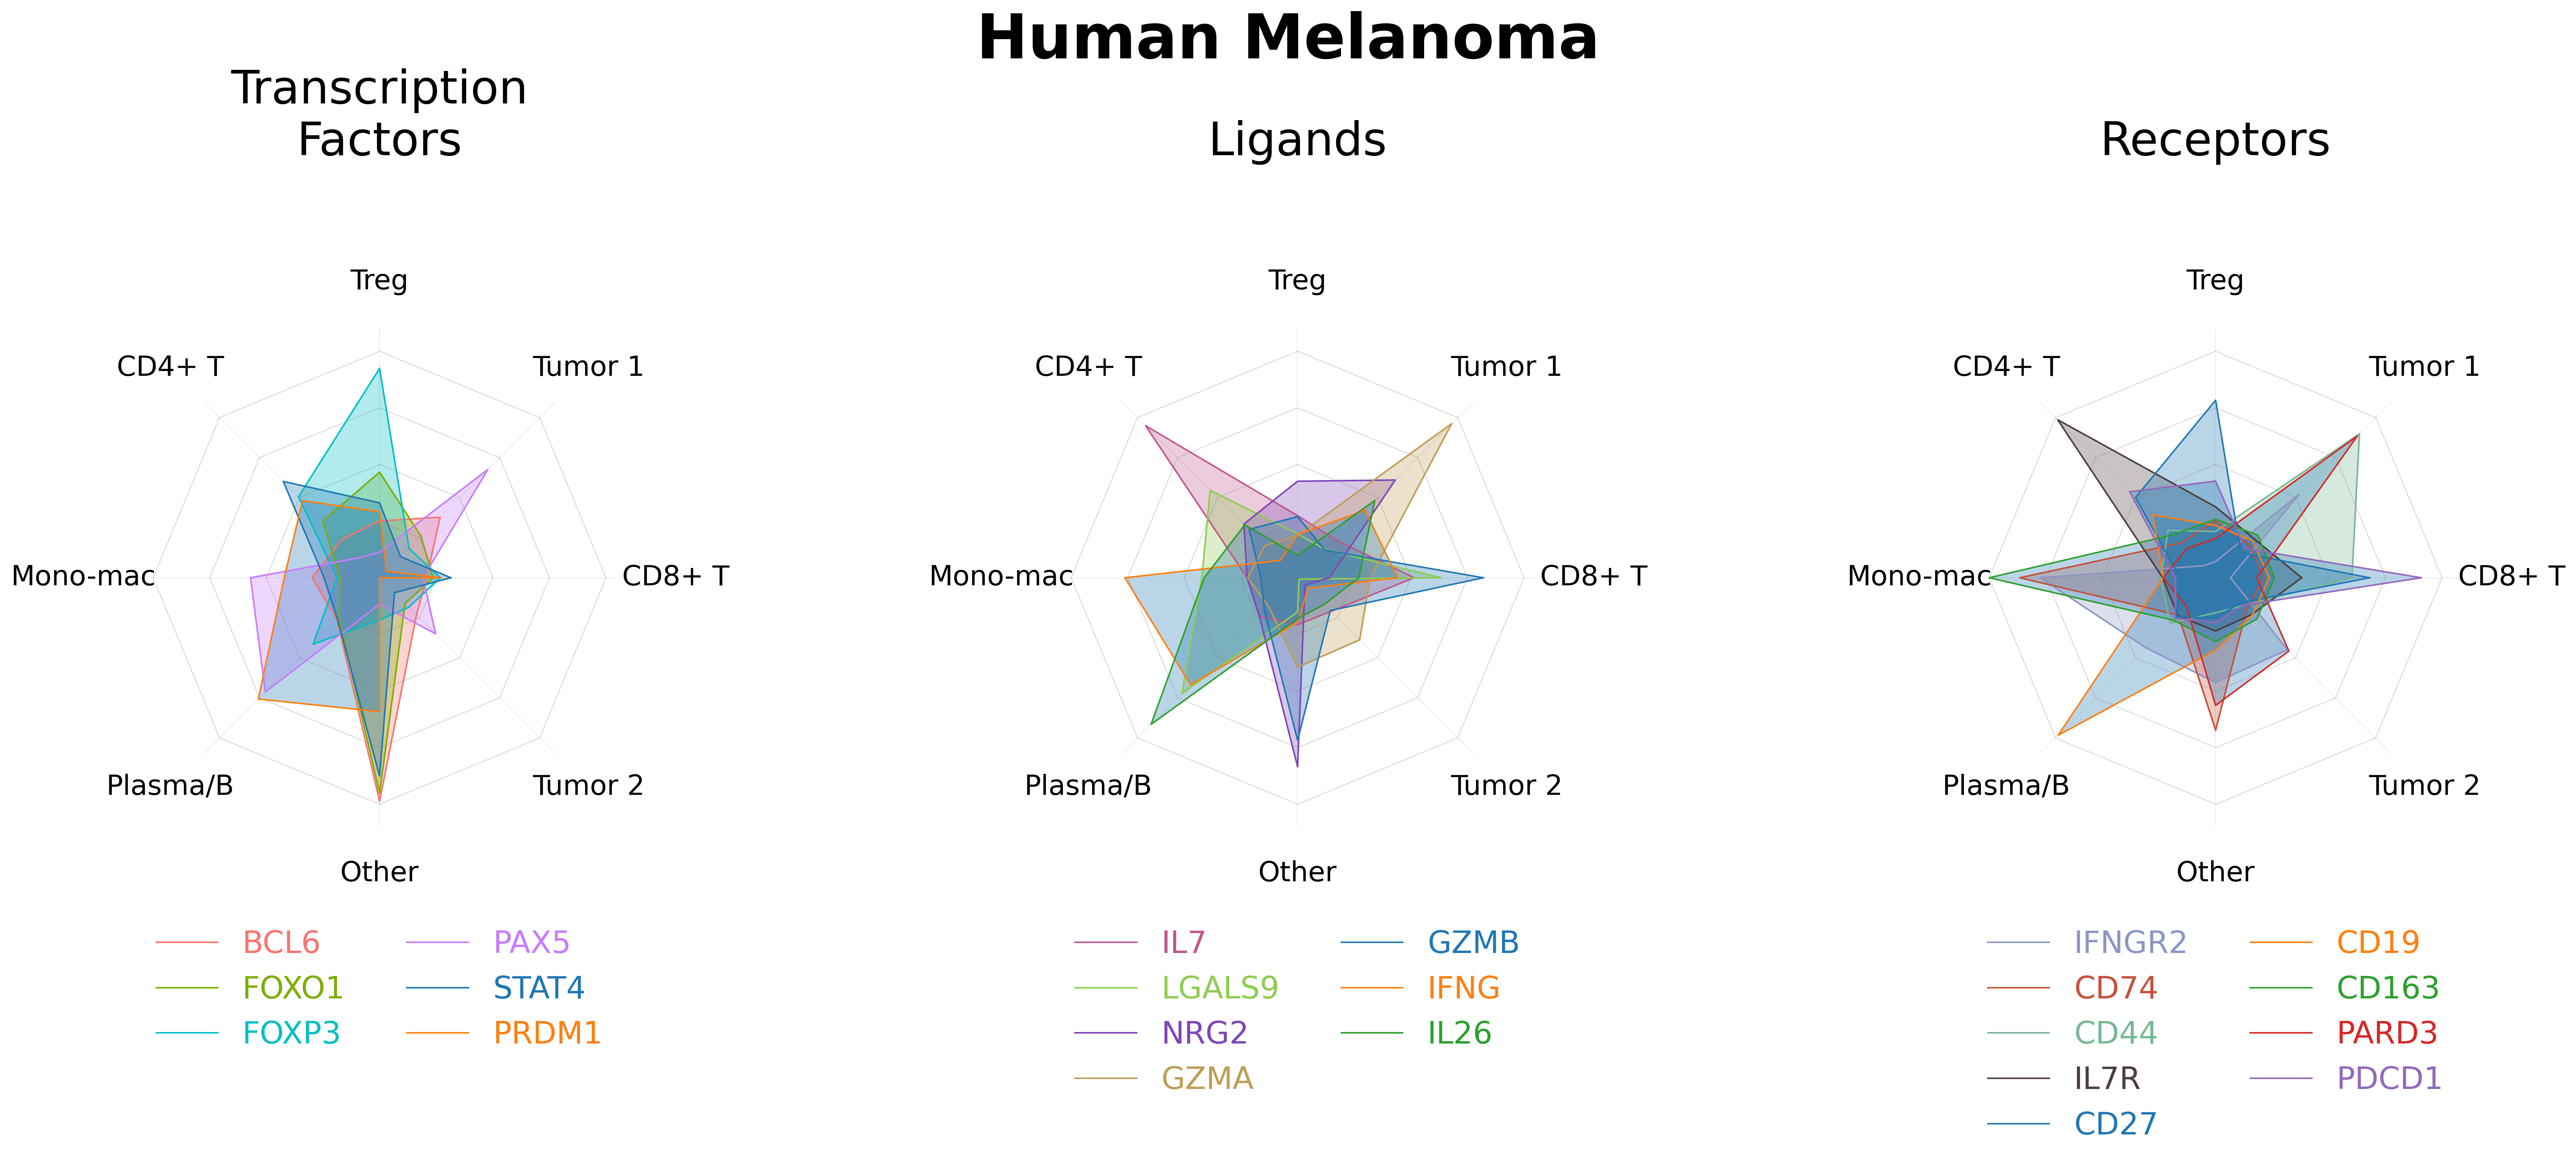

In [41]:
genesets = [
    ['BCL6', 'FOXO1',  'FOXP3', 'PAX5', 'STAT4', 'PRDM1'],
    ['IL7',  'LGALS9', 'NRG2', 'GZMA', 'GZMB', 'IFNG', 'IL26'],
    ['IFNGR2', 'CD74', 'CD44', 'IL7R', 'CD27', 'CD19', 'CD163', 'PARD3', 'PDCD1'],
]

show_for = ['CD8+ T', 'Tumor 1', 'Treg', 'CD4+ T', 'Mono-mac', 'Plasma/B', 'Other', 'Tumor 2']

fig, axs = plt.subplots(1, 3, figsize=(25, 8), dpi=300,
                subplot_kw={'projection': 'polar'})

melanoma.plot_radar(impact_df=impact_df,
    genes=genesets,
    show_for=show_for, 
    figsize=(30, 8),
    dpi=300,
    label_size=18,
    legend_size=20,
    axes=axs,
    colors=colors,
    fig=fig,
    
)

fontsize = 30
axs[0].set_title('Transcription\nFactors\n\n', fontsize=fontsize)
axs[1].set_title('Ligands\n\n', fontsize=fontsize)
axs[2].set_title('Receptors\n\n', fontsize=fontsize)
plt.suptitle('Human Melanoma', fontsize=40, fontweight='bold', y=1.3)
plt.savefig('./figures/melanoma_radar.svg', **figure_params)
plt.show()